In [1]:
import sys
sys.path.append("../scripts")


In [2]:
from fetch_data import DataLoader

df = DataLoader.read_csv("../data/Debernardi et al 2020 data.csv")

Pandas: CSV read from: ../data/Debernardi et al 2020 data.csv


In [3]:
from cleaning import CleanDataFrame
from exploration import Analysis
from visualization import Plotters

cleaner = CleanDataFrame()
analyzer = Analysis()
plotters = Plotters(w=8, h=8)


# Data Understanding

In this section, I will explore basics of the dataset. This will include shape, counting missing values, univariate and bi-variate data analysis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            590 non-null    int64  
 1   sex            590 non-null    object 
 2   diagnosis      590 non-null    int64  
 3   plasma_CA19_9  590 non-null    float64
 4   creatinine     590 non-null    float64
 5   LYVE1          590 non-null    float64
 6   REG1B          590 non-null    float64
 7   TFF1           590 non-null    float64
 8   REG1A          590 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 41.6+ KB


In [5]:
analyzer.percent_missing(df)

The dataset contains 0.0 % missing values.


In [6]:
analyzer.get_univariate_analysis(df)

,count,mean,std,min,25%,50%,75%,max,mode,CoV,skew,kurtosis,iqr,missing_counts
age,590.0,59.079661,13.109520,26.000000,50.000000,60.000000,69.000000,89.000000,68.000000,0.221896,-0.216832,-0.511899,19.000000,0
diagnosis,590.0,2.027119,0.804873,1.000000,1.000000,2.000000,3.000000,3.000000,2.000000,0.397053,-0.049186,-1.454333,2.000000,0
plasma_CA19_9,590.0,398.747509,1896.028213,0.000000,17.000000,26.500000,41.750000,31000.000000,26.500000,4.754959,10.376093,136.966308,24.750000,0
creatinine,590.0,0.855383,0.639028,0.056550,0.373230,0.723840,1.139482,4.116840,0.576810,0.747067,1.466413,2.739650,0.766253,0
LYVE1,590.0,3.063530,3.438796,0.000129,0.167179,1.649862,5.205037,23.890323,0.000814,1.122495,1.394014,2.419378,5.037858,0
REG1B,590.0,111.774090,196.267110,0.001104,10.757216,34.303353,122.741013,1403.897600,1.769536,1.755927,3.333925,13.077588,111.983796,0
TFF1,590.0,597.868722,1010.477245,0.005293,43.961000,259.873974,742.736000,13344.300000,0.024701,1.690132,5.158302,47.635879,698.775000,0
REG1A,590.0,394.105176,1120.564240,0.000000,26.500000,26.500000,224.007000,13200.000000,26.500000,2.843313,6.107913,48.241487,197.507000,0


The above table indicates that a lot of the data is skewed. It doesn't follow a normal distribution. Specifically the `CoV`, `skew`, `kurtosis`, and `iqr` columns indicate this clearly.

We can also observe this more clearly with a box plot.

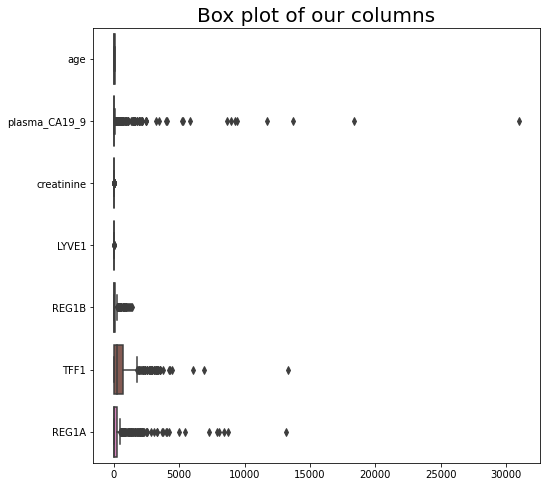

In [7]:
plotters.plot_box(df.drop(columns=["diagnosis"]), title="Box plot of our columns")

At first I thought that the outlier behaviour might be a big indicator that the sample is from a patient with a problem. Below here, Is my finding

First the control groups / healthy samples

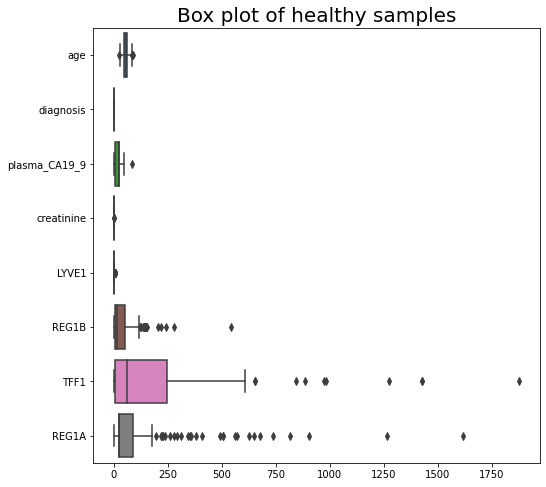

In [22]:
plotters.plot_box(df[df.diagnosis == 1], title="Box plot of healthy samples")


Then the benign hepatobiliary disease. These are samples that have some disease which is not cancer.

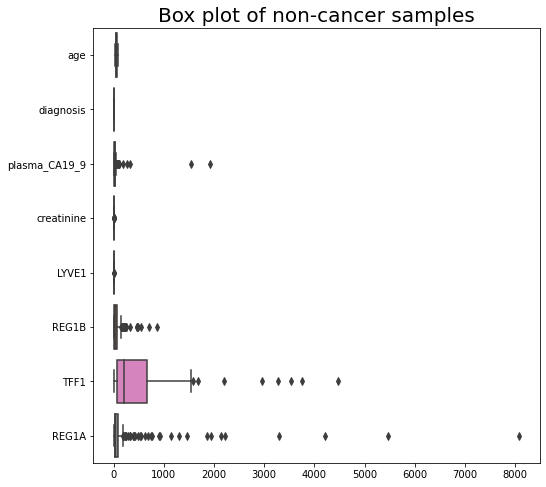

In [11]:
plotters.plot_box(df[df.diagnosis == 2], title="Box plot of non-cancer samples")


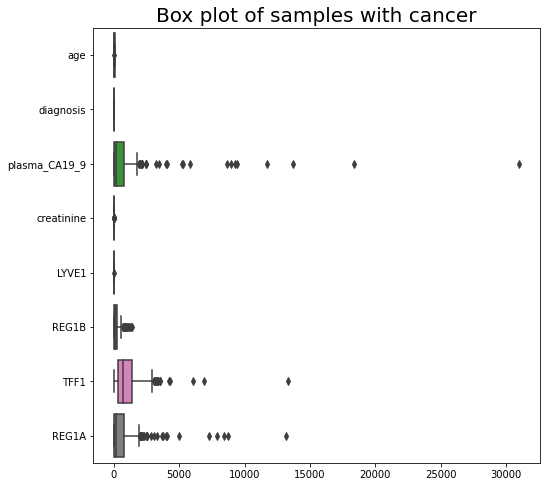

In [12]:
plotters.plot_box(df[df.diagnosis == 3], title="Box plot of samples with cancer")


In [33]:
df[(df.TFF1 > 3000) & (df.diagnosis == 1)]

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A


The above plots prove my assumption that the values being outside of the normal distribution is an indicator for the presence of abnormality in the sample. 

Next, I will see the correlation between the variables and the target column

## Correlation

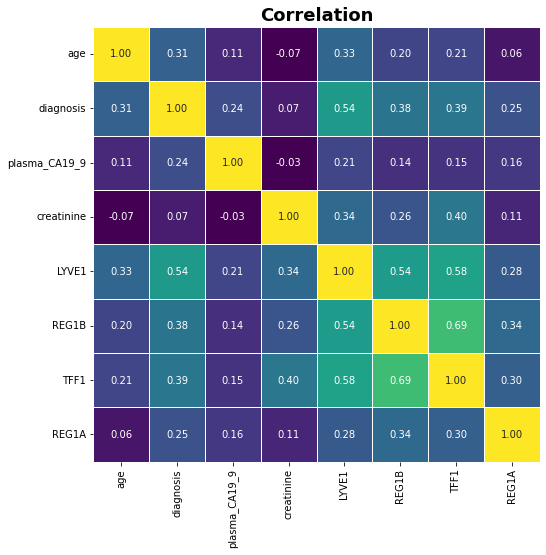

In [37]:
plotters.plot_heatmap(df.corr(method="pearson"), "Correlation")

The pairwise correlation between the features is not very promising. This might make getting a good model performance hard.